In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Class for K Nearest Neighbours 

In [26]:
class KNN:
    X = None # features of training examples, numpy array of dimension m x n where m is number of examples and n is number of features
    y = None # target values or lables of training examples, numpy array dimension m x 1
    K = 5    # number of neighbours to consider for predictions

    def __init__(self, X_train, y_train, k = 5):
        self.X = X_train
        self.y = y_train
        self.K = k

    def makeNeighbours(self, data):
        # function to get k nearest neighbours of given data point
        # data : features of data point for which neighbours are to be found, numpy array of length n where n is number of features
        # neighbours : neighbours of data point, numpy array of dimension k x 2 consisting of k neighbours [label or value, distance]

        data = np.tile(data, (X.shape[0],1))

        dist = np.sqrt(np.sum(np.square(X - data), axis = 0))
        
        neighbours = [ [y[i] , dist[i]] for i in range(X.shape[0]) ]

        neighbours.sort(key = lambda x: x[1])

        neighbours = neighbours[:self.K]

        return np.array(neighbours)
    
    def regress(self, data):
        # function for regression using KNN on given data
        # data : features of data for making predictions, numpy array of dimension m x n where m is number of data points and n is number of features
        # predictions : value predicted by taking average of targets of k neighbours, numpy array of dimensions m x 1

        predictions = []

        for d in data:
            neighbours = self.makeNeighbours(d)
            
            pred = 0.0

            for n in neighbours:
                pred += n[0]
            
            pred /= len(neighbours)

            predictions.append(pred)

        return np.array(predictions)

    def classify(self, data):
        # function for classification using KNN on given data
        # data : features of data for making predictions, numpy array of dimension m x n where m is number of data points and n is number of features
        # predictions : value predicted by taking majority voting of labels of k neighbours, numpy array of dimensions m x 1
        
        predictions = []

        for d in data:
            neighbours = self.makeNeighbours(d)
            counts = {}

            for n in neighbours:
                if n[0] in counts:
                    counts[n[0]] += 1
                else:
                    counts[n[0]] = 1
            
            predictions.append(max(counts, key = counts.get))
        
        return np.array(predictions)

    def test(self, X_test, y_test, target_type = "cont"):
        # function to calculate root mean squared error for testing data
        # X_test : feature value for testing data, numpy array of dimension m x n where m is number of examples and n is number of features
        # y_test : target values for testing data, numpy array of dimension m x 1 where m is number of examples
        # target_type : wether target is discrete or continuous, cont for continuous and disc for discrete        

        pred = None
        if target_type == "cont":
            pred = self.regress(X_test)
        else:
            pred = self.classify(X_test)

        rmse = (np.dot(pred - y_test, pred - y_test)/len(pred))**0.5
        return rmse


# Generating artificial data for testing KNN

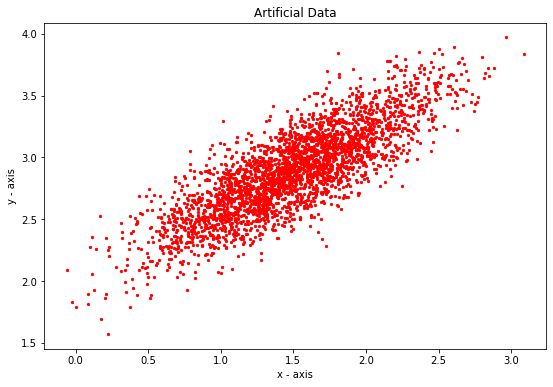

In [27]:
np.random.seed(0)

# Initialising an array of 3000 values with mean = 1.5 & standard deviation = 0.5
X = 0.5 * np.random.randn(3000) + 1.5

# Generating 3000 residual terms
res = 0.2 * np.random.randn(3000)

# Actual values of y
y = 2 + 0.6 * X + res

# Plotting the points generated
plt.figure(figsize=(9,6))
plt.scatter(X, y, marker='.', s=20, color='r')
plt.title('Artificial Data')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.show()

# Plotting predicted values

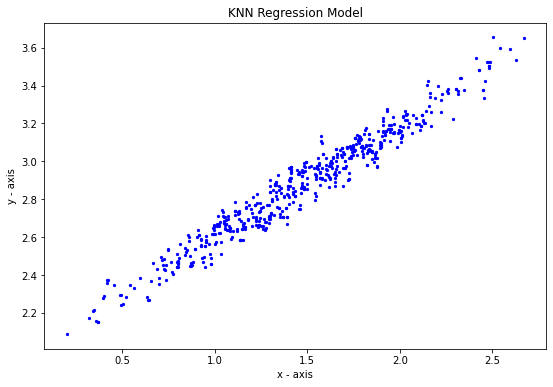

In [28]:
# split data into test and train data

split = int(0.8*len(X))
xtrain = X[0:split]
ytrain = y[0:split]
xtest = X[split:]
ytest = y[split:]

# create the model
model = KNN(xtrain, ytrain, k=10)

# make predictions on test data
preds = model.regress(xtest)
rmse = model.test(xtest, ytest, target_type="cont")

#plot the predicted values
plt.figure(figsize=(9,6))
plt.scatter(xtest, preds, marker='.', s=20, color='b')
plt.title('KNN Regression Model')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.show()


In [29]:
rmse

0.18463705472422923